Introduction to data science : Case Study 2

Team Members : Yash Malviya  , Rutuja Dongre - MS in Data science Fall 23

Submitted to : Prof.Torumouy Ghoshal


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import ensemble,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier


In [1]:
training_data = pd.read_csv("trainingData.csv")
training_data.head()

NameError: name 'pd' is not defined

In [ ]:
testing_data  = pd.read_csv("testingData.csv")
testing_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7559.782000,4864871.373,2,1,108,2,2,23,1371714466
1,100,100,100,100,100,100,100,100,100,100,...,100,-7537.339900,4864895.785,2,1,117,2,2,23,1371714554
2,100,100,100,100,100,100,100,100,100,100,...,100,-7555.132300,4864885.252,2,1,107,2,2,23,1371714508
3,100,100,100,100,100,100,100,100,100,100,...,100,-7521.867186,4864889.477,2,1,29,1,2,23,1371714811
4,100,100,100,100,100,100,100,100,100,-95,...,100,-7520.755800,4864891.482,2,1,29,2,2,23,1371714878


In [ ]:
validation_data = pd.read_csv("validationData.csv")
validation_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [ ]:
#deciding target variables such as Floor ID and Building Id as both are targets and concatenating them to one single columns with handling missing values.

selected_columns = training_data[training_data.columns[522:524]]
y = [','.join(row.dropna().astype(str)) for _, row in selected_columns.iterrows()]
print(y)
encode = LabelEncoder()
#Getting unique Y
Y_uniques = encode.fit_transform(y)
print(Y_uniques)

#Setting up X

x_previous  = training_data.iloc[:,:522]

x_previous.replace(100, -200, inplace=True)

x = 104 - x_previous



#applying train test split with 80-20 rule and with shuffling to ensure the data is randomized

x_train , x_test , y_train , y_test = train_test_split(x,Y_uniques , shuffle=True , test_size=0.2)

#doing the above procedures with validation Dataset

y_1 = training_data[training_data.columns[522:524]]
Y = [','.join(row.dropna().astype(str)) for _, row in y_1.iterrows()]
#print(y)
encode = LabelEncoder()
#Getting unique Y
Y_Val = encode.fit_transform(Y)
#print(Y_uniques)

#Setting up X
x_previous_val  = training_data.iloc[:,:522]

x_previous_val.replace(100, -200, inplace=True)

x_val = 104 - x_previous_val




['2,1', '2,1', '2,1', '2,1', '0,0', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '3,2', '3,2', '2,1', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '2,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '3,2', '2,1', '2,1', '3,2', '3,2', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1', '2,1'

In [ ]:
#applying Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predictions on the validation set
y_pred = logreg.predict(x_val)
print("Y values predicted " , y_pred)

# Evaluate the model
accuracy = accuracy_score(Y_Val, y_pred)
print("Accuracy of Logistic Regression on the validation set: %", accuracy*100 )


Y values predicted  [ 4  4  4 ...  7 10 10]
Accuracy of Logistic Regression on the validation set: % 81.61709384561368


KNN Classifier

In [ ]:
Knn_cl = KNeighborsClassifier()
Knn_cl.fit(x_train , y_train)

y_pred_knn = Knn_cl.predict(x_val)

accuracy_Knn = accuracy_score(y_pred_knn , Y_Val)

print("Accuracy score of KNN based on Validation Set :" , accuracy_Knn)


Accuracy score of KNN based on Validation Set : 0.9868084466068114


Random forest Algorithm


In [ ]:
# Applying Random Forest Algorithm
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(x_train, y_train)

# Predictions on the validation set
y_pred_rf = random_forest.predict(x_val)

# Evaluate the model
accuracy_rf = accuracy_score(Y_Val, y_pred_rf)
print("Accuracy of Random Forest on the validation set:", accuracy_rf)


Accuracy of Random Forest on the validation set: 0.8241460600892813


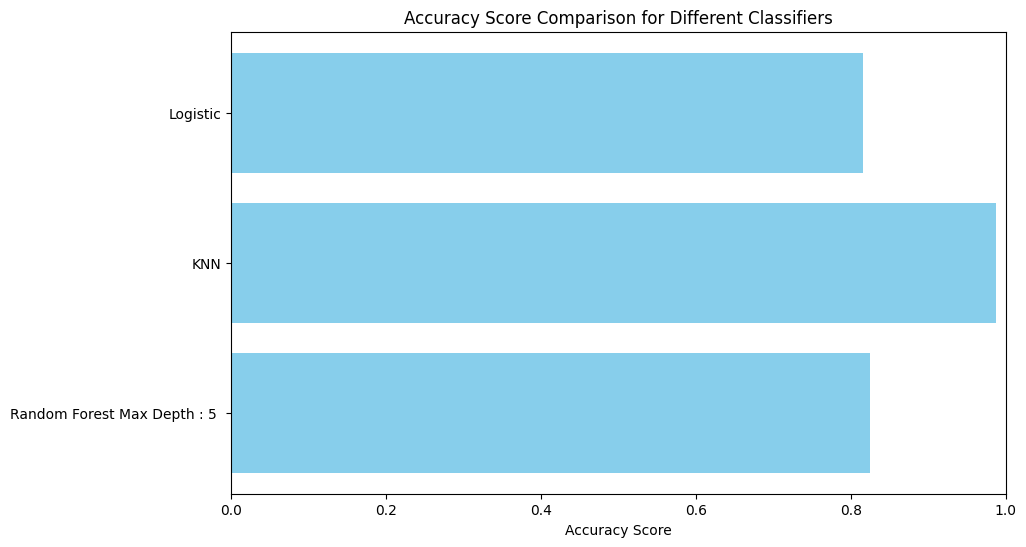

In [ ]:
#Visualizing the Diffrent accuracy scores into a bar chart or grouped bar chart

# Sample accuracy scores for each classifier
accuracy_scores = [accuracy , accuracy_Knn , accuracy_rf ]

# Classifier names
classifiers = ["Logistic", "KNN", "Random Forest Max Depth : 5 "]

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Classifiers')
plt.xlim(0, 1)  # Set x-axis limit to match accuracy range (0 to 1)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy on top
plt.show()


In [ ]:
div=[0.2,0.4,0.6,0.8]
K_cla = KNeighborsClassifier()
accuracy = []
for i in div:
    for j in range (1,4): #three iterations for every dataset division set
        x_t, x_te,y_t,y_te = train_test_split(x_train,y_train, train_size=i, shuffle=True)
        K_cla.fit(x_t,y_t)
        yp = K_cla.predict(x_test)
        yv = K_cla.predict(x_val)
        score = accuracy_score(y_test,yp)
        print(K_cla)
        print("Testing Accuracy:",score,"Train Size:",i*100,"Iteration:",j)
        accuracy.append(score)


for a in range (1,4):
    K_cla.fit(x_train,y_train)
    yp = K_cla.predict(x_test)
    yv = K_cla.predict(x_val)

    score = accuracy_score(y_test,yp)


    print(K_cla)
    print("Testing Accuracy:",score,"Train Size:",1*100,"Iteration:",a)
    accuracy.append(score)


KNeighborsClassifier()
Testing Accuracy: 0.9320461384152458 Train Size: 20.0 Iteration: 1
KNeighborsClassifier()
Testing Accuracy: 0.9310431293881645 Train Size: 20.0 Iteration: 2
KNeighborsClassifier()
Testing Accuracy: 0.9300401203610833 Train Size: 20.0 Iteration: 3
KNeighborsClassifier()
Testing Accuracy: 0.9601303911735206 Train Size: 40.0 Iteration: 1
KNeighborsClassifier()
Testing Accuracy: 0.9606318956870612 Train Size: 40.0 Iteration: 2
KNeighborsClassifier()
Testing Accuracy: 0.9616349047141425 Train Size: 40.0 Iteration: 3
KNeighborsClassifier()
Testing Accuracy: 0.970160481444333 Train Size: 60.0 Iteration: 1
KNeighborsClassifier()
Testing Accuracy: 0.9711634904714143 Train Size: 60.0 Iteration: 2
KNeighborsClassifier()
Testing Accuracy: 0.9719157472417251 Train Size: 60.0 Iteration: 3
KNeighborsClassifier()
Testing Accuracy: 0.9771815446339017 Train Size: 80.0 Iteration: 1
KNeighborsClassifier()
Testing Accuracy: 0.978184553660983 Train Size: 80.0 Iteration: 2
KNeighborsCl

In [ ]:
div.append(1.0)
acc_df = pd.DataFrame({"Ratios":div,"1st Iteration":accuracy[0::3],"2nd Iteration":accuracy[1::3],"3rd Iteration":accuracy[2::3]})
print(acc_df)

   Ratios  1st Iteration  2nd Iteration  3rd Iteration
0     0.2       0.932046       0.931043       0.930040
1     0.4       0.960130       0.960632       0.961635
2     0.6       0.970160       0.971163       0.971916
3     0.8       0.977182       0.978185       0.979438
4     1.0       0.982197       0.982197       0.982197


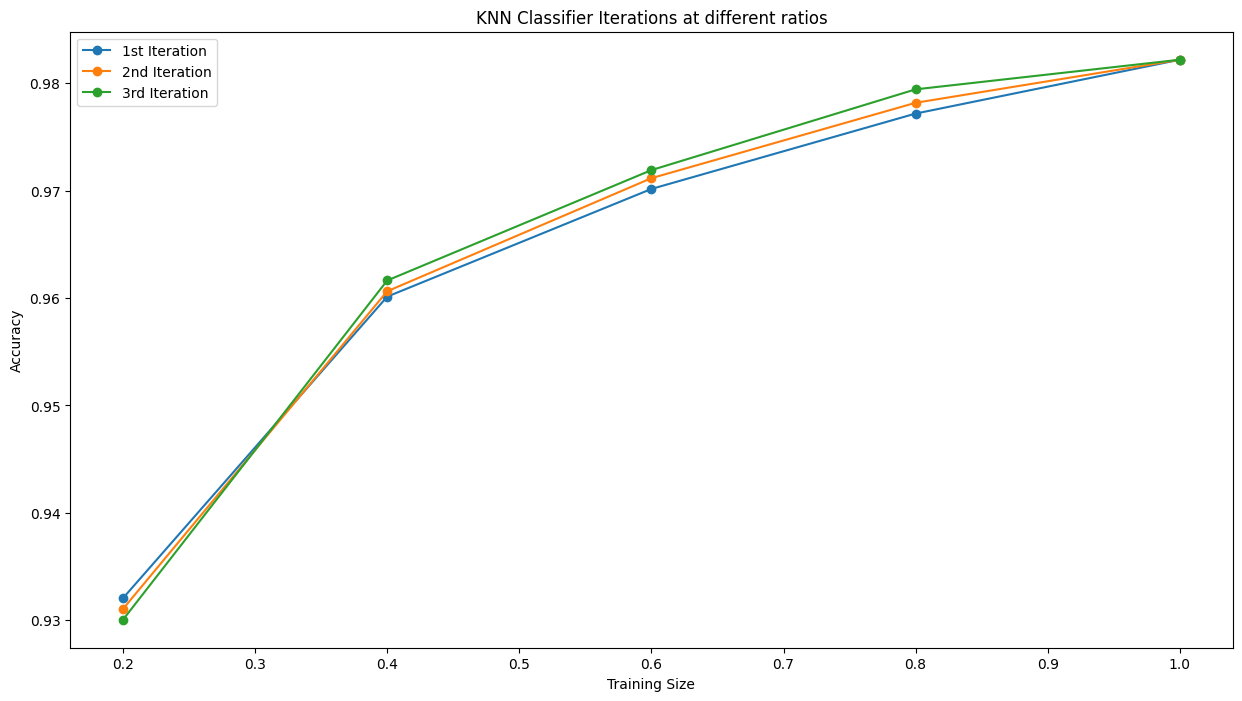

In [ ]:
cols = acc_df.columns
plt.figure(figsize=(15, 8))
for i in range(1, 4):
    plt.plot(acc_df[cols[0]], acc_df[cols[i]], label=cols[i], marker='o')

plt.legend(loc='best')
plt.title("KNN Classifier Iterations at different ratios")
plt.ylabel("Accuracy")
plt.xlabel("Training Size")
plt.show()
